### aim: 

### date: 

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut
from scipy import stats

import pymannkendall as mk

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [15]:
def make_yearlist_UKESM(yrst, yrend, scen = '1A'):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [16]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [17]:
# t_2B = xr.open_mfdataset(make_yearlist_UKESM(2070, 2072, scen = '2B'))
# t_2A = xr.open_mfdataset(make_yearlist_UKESM(2070, 2072, scen = '2A'))

# t_2A.wspd10m[10,100,100].values
#t_2B.wspd10m[12,100,100]
bdi = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'
t_2A = xr.open_dataset(f'{bdi}UKESM_2A_y2090m12_wspd10m_daily_rg.nc')
t_2B = xr.open_dataset(f'{bdi}UKESM_2B_y2090m12_wspd10m_daily_rg.nc')

print(t_2B.wspd10m[0,120,100])
print(t_2A.wspd10m[0,120,100])

<xarray.DataArray 'wspd10m' ()>
array(1.250408, dtype=float32)
Coordinates:
    lon      float64 100.0
    lat      float64 30.5
    day      int64 331
<xarray.DataArray 'wspd10m' ()>
array(0.943902, dtype=float32)
Coordinates:
    lon      float64 100.0
    lat      float64 30.5
    day      int64 331


In [18]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
tmask = cdomask.tmask

extract = False


if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, 'PI'))

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask
    
    t1 = 1950; t2 = 2101
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    test = ylist_UKESM_1A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
    ##
    test = ylist_UKESM_1B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_PI.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')

In [19]:
baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

wspd_PI = xr.open_dataset(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')
wspd_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

In [20]:
wspd_1A

<xarray.Dataset>
Dimensions:       (time_counter: 604)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-15 ... 2100-10-15
Data variables:
    wspd10m       (time_counter) float64 ...
Attributes:
    made in:  SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


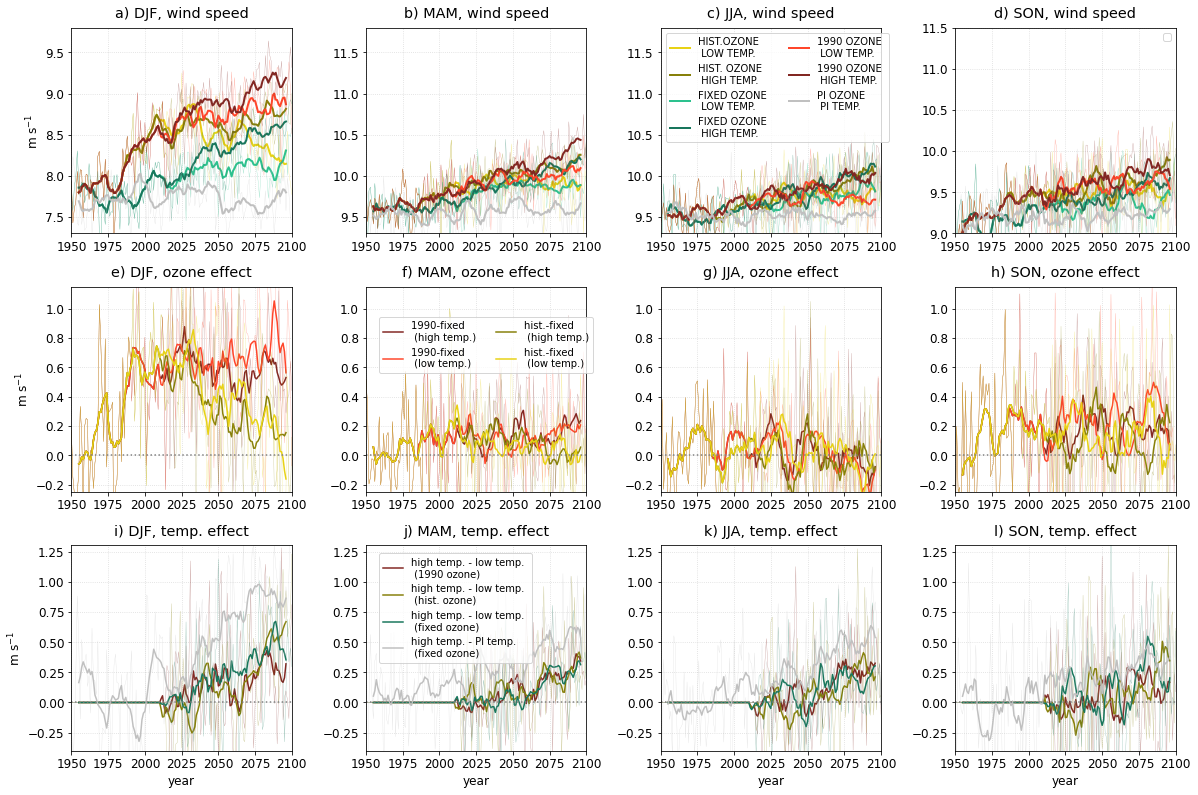

In [21]:
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.4
ypos = 1.02
fs2 = 10

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B, wspd_PI]
scens = ['1A', '1B', '2A', '2B', '3A', '3B','PI']

for x in range(0,7):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [7.3, 9.3, 9.3, 9.0]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = ypos)
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2, fontsize = fs2)
    axs[i].set_ylim([-0.25,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A), (wspd_2B-wspd_PI)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color'], 'silver']
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)',
         'high temp. - low temp. \n (fixed ozone)', 'high temp. - PI temp. \n (fixed ozone)' ]
for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.43), fontsize = fs2)
    axs[i].set_ylim([-0.4,1.3])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.22
plt.subplots_adjust(wspace=tsp, hspace=tsp)
plt.tight_layout()
fig.savefig('./figs/Fig-wspdcombined.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


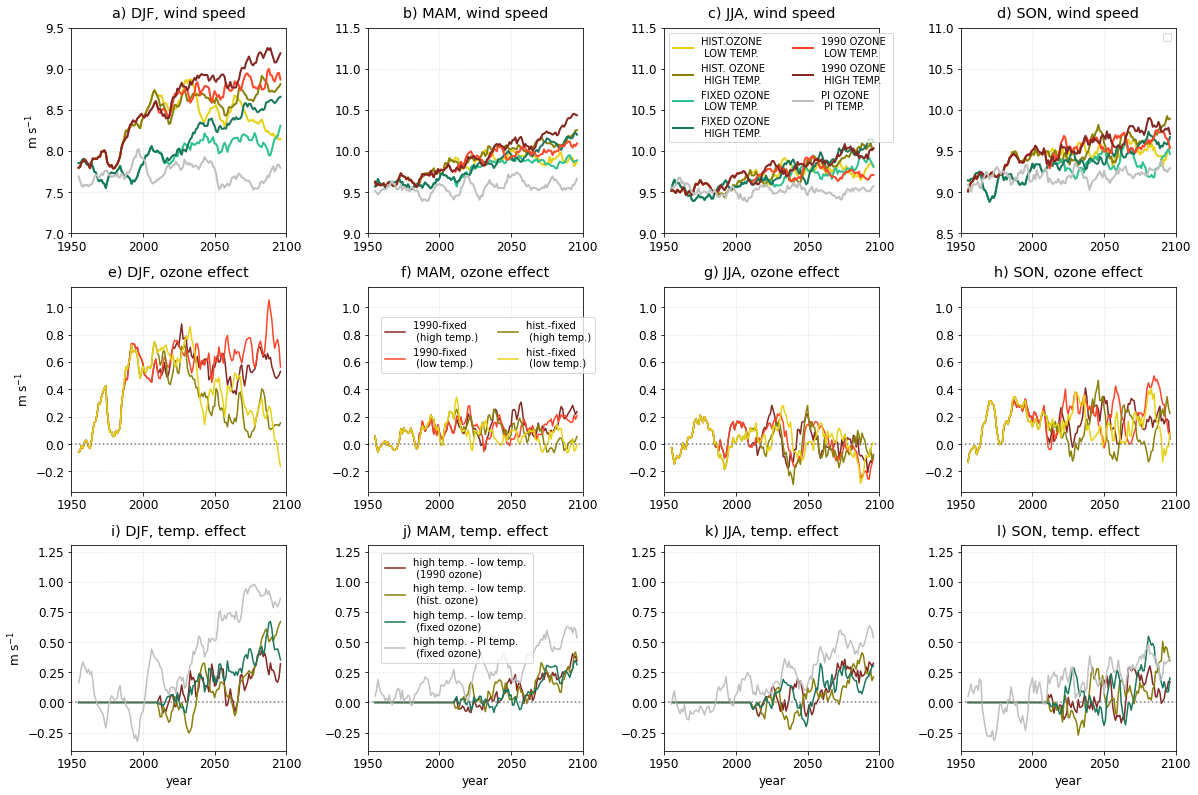

In [26]:
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.4
ypos = 1.02
fs2 = 10

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B, wspd_PI]
scens = ['1A', '1B', '2A', '2B', '3A', '3B','PI']

for x in range(0,7):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [7.0, 9, 9, 8.5]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = ypos)
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2, fontsize = fs2)
    axs[i].set_ylim([-0.35,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A), (wspd_2B-wspd_PI)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color'], 'silver']
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)',
         'high temp. - low temp. \n (fixed ozone)', 'high temp. - PI temp. \n (fixed ozone)' ]
for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.43), fontsize = fs2)
    axs[i].set_ylim([-0.4,1.3])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.22
plt.subplots_adjust(wspace=tsp, hspace=tsp)
plt.tight_layout()
fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-windlines.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)

In [27]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p

    
def give_summary_1950_2100(wspd, verbose = False):
    
    data = np.zeros([5,8])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,4):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-1950-2100','lin-1950-2100',\
                                   'MK-1950-2000','lin-1950-2000',\
                                   'MK-2000-2050','lin-2000-2050',\
                                   'MK-2050-2100','lin-2050-2100',\
                                   ],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)



1A
     MK-1950-2100  lin-1950-2100  MK-1950-2000  lin-1950-2000  MK-2000-2050  \
FY       0.029650       0.027540      0.066177       0.063205        -999.0   
DJF      0.035160       0.035193      0.122595       0.121807        -999.0   
MAM      0.027223       0.024876   -999.000000    -999.000000        -999.0   
JJA      0.024096       0.023339   -999.000000    -999.000000        -999.0   
SON      0.029604       0.026753      0.099119       0.093785        -999.0   

     lin-2000-2050  MK-2050-2100  lin-2050-2100  
FY          -999.0   -999.000000    -999.000000  
DJF         -999.0     -0.081208      -0.076564  
MAM         -999.0   -999.000000    -999.000000  
JJA         -999.0   -999.000000    -999.000000  
SON         -999.0   -999.000000    -999.000000  

2A
     MK-1950-2100  lin-1950-2100  MK-1950-2000  lin-1950-2000  MK-2000-2050  \
FY       0.028498       0.028206        -999.0         -999.0      0.033615   
DJF      0.034613       0.035567        -999.0         -999

In [32]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


#data = np.zeros([5,8])



    
def give_summary(wspd, verbose = False):
    
    data = np.zeros([5,10])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    
    s_y = [1940,1940,1980,2020,2060]
    e_y = [2100,1979,2019,2059,2099]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,5):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-1940-2100','lin-1940-2100',\
                                    'MK-1940-1980','lin-1940-1980',\
                                    'MK-1980-2020','lin-1980-2020',\
                                    'MK-2020-2060','lin-2020-2060',\
                                    'MK-2060-2100','lin-2060-2100',],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)



1A
     MK-1940-2100  lin-1940-2100  MK-1940-1980  lin-1940-1980  MK-1980-2020  \
FY       0.028819       0.026817      0.061568         -999.0      0.098746   
DJF      0.033148       0.033066   -999.000000         -999.0      0.212102   
MAM      0.026859       0.024599   -999.000000         -999.0      0.081165   
JJA      0.024109       0.023382   -999.000000         -999.0      0.084622   
SON      0.028984       0.026219   -999.000000         -999.0   -999.000000   

     lin-1980-2020  MK-2020-2060  lin-2020-2060  MK-2060-2100  lin-2060-2100  
FY        0.092424        -999.0    -999.000000     -0.041355    -999.000000  
DJF       0.192713        -999.0      -0.097618     -0.147273      -0.144527  
MAM       0.079557        -999.0    -999.000000   -999.000000    -999.000000  
JJA       0.082229        -999.0    -999.000000   -999.000000    -999.000000  
SON    -999.000000        -999.0    -999.000000   -999.000000    -999.000000  

2A
     MK-1940-2100  lin-1940-2100  MK-1940-1

In [35]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


#data = np.zeros([5,8])



    
def give_summary(wspd, verbose = False):
    
    data = np.zeros([5,2])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    
    s_y = [2020]
    e_y = [2080]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,1):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-2020-2100','lin-2020-2100'],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)



1A
     MK-2020-2100  lin-2020-2100
FY         -999.0     -999.00000
DJF        -999.0       -0.04659
MAM        -999.0     -999.00000
JJA        -999.0     -999.00000
SON        -999.0     -999.00000

2A
     MK-2020-2100  lin-2020-2100
FY         -999.0         -999.0
DJF        -999.0         -999.0
MAM        -999.0         -999.0
JJA        -999.0         -999.0
SON        -999.0         -999.0

3A
     MK-2020-2100  lin-2020-2100
FY         -999.0         -999.0
DJF        -999.0         -999.0
MAM        -999.0         -999.0
JJA        -999.0         -999.0
SON        -999.0         -999.0

1B
     MK-2020-2100  lin-2020-2100
FY       0.034699       0.032806
DJF   -999.000000    -999.000000
MAM      0.028310       0.033289
JJA      0.043930       0.046361
SON   -999.000000    -999.000000

2B
     MK-2020-2100  lin-2020-2100
FY       0.065333       0.062646
DJF      0.085165       0.083586
MAM      0.061446       0.059746
JJA      0.062562       0.060826
SON   -999.000000      

# spatial mann-kendall;

# 5 x 7 wind trends 1950-2100 and 2020-2100



In [25]:
extract = False



def make_mkspat(tscen,ylist_UKESM):

    savenam = f'/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_{tscen}_MK-1950-2100.nc'
    print(savenam)

    UKESM_DJF = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    UKESM_MAM = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    UKESM_JJA = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    UKESM_SON = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    UKESM_FY = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(UKESM_FY)

    w = time.time()

    tdats = [UKESM_FY, UKESM_DJF, UKESM_MAM,UKESM_JJA, UKESM_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            if i%20 == 0:
                print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 1950-2100'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 1950-2100'}),
    }

    lats = ylist_UKESM.lat.isel(lat = slice(0,60)).values
    lons = ylist_UKESM.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)

    return ds

if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, 'PI'))
    
#     ds = make_mkspat('1A',ylist_UKESM_1A)
#     ds = make_mkspat('2A',ylist_UKESM_2A)
#     ds = make_mkspat('3A',ylist_UKESM_3A)
#     ds = make_mkspat('1B',ylist_UKESM_1B)
#     ds = make_mkspat('2B',ylist_UKESM_2B)
#     ds = make_mkspat('3B',ylist_UKESM_3B)
    ds = make_mkspat('PI',ylist_UKESM_PI)

In [ ]:
extract = True


def make_mkspat(tscen,ylist_UKESM):

    savenam = f'/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_{tscen}_MK-2020-2100.nc'
    print(savenam)

    UKESM_DJF = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    UKESM_MAM = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    UKESM_JJA = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    UKESM_SON = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    UKESM_FY = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(UKESM_FY)

    w = time.time()

    tdats = [UKESM_FY, UKESM_DJF, UKESM_MAM,UKESM_JJA, UKESM_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            if i%20 == 0:
                print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 2020-2100'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 2020-2100'}),
    }

    lats = ylist_UKESM.lat.isel(lat = slice(0,60)).values
    lons = ylist_UKESM.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)

    return ds

if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, 'PI'))

    
#     ds = make_mkspat('1A',ylist_UKESM_1A)
#     ds = make_mkspat('2A',ylist_UKESM_2A)
#     ds = make_mkspat('3A',ylist_UKESM_3A)
#     ds = make_mkspat('1B',ylist_UKESM_1B)
#     ds = make_mkspat('2B',ylist_UKESM_2B)
#     ds = make_mkspat('3B',ylist_UKESM_3B)
    ds = make_mkspat('PI',ylist_UKESM_PI)

In [ ]:
tdir = '/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/'

s1A_2020 = xr.open_dataset(f'{tdir}UKESM_1A_MK-2020-2100.nc')
s1B_2020 = xr.open_dataset(f'{tdir}UKESM_1B_MK-2020-2100.nc')
s2A_2020 = xr.open_dataset(f'{tdir}UKESM_2A_MK-2020-2100.nc')
s2B_2020 = xr.open_dataset(f'{tdir}UKESM_2B_MK-2020-2100.nc')
s3A_2020 = xr.open_dataset(f'{tdir}UKESM_3A_MK-2020-2100.nc')
s3B_2020 = xr.open_dataset(f'{tdir}UKESM_3B_MK-2020-2100.nc')
sPI_2020 = xr.open_dataset(f'{tdir}UKESM_PI_MK-2020-2100.nc')

s1A_1950 = xr.open_dataset(f'{tdir}UKESM_1A_MK-1950-2100.nc')
s1B_1950 = xr.open_dataset(f'{tdir}UKESM_1B_MK-1950-2100.nc')
s2A_1950 = xr.open_dataset(f'{tdir}UKESM_2A_MK-1950-2100.nc')
s2B_1950 = xr.open_dataset(f'{tdir}UKESM_2B_MK-1950-2100.nc')
s3A_1950 = xr.open_dataset(f'{tdir}UKESM_3A_MK-1950-2100.nc')
s3B_1950 = xr.open_dataset(f'{tdir}UKESM_3B_MK-1950-2100.nc')
sPI_1950 = xr.open_dataset(f'{tdir}UKESM_PI_MK-1950-2100.nc')



In [ ]:
s3B_1950

In [ ]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = 8)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=8)
    return cb


In [ ]:
def plot_mk_with_sigmask(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
    tmi = -0.3; tma = 20
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    
fact = 0.25
fig = plt.figure(figsize=[77*fact, 77*fact])
tmi = -0.3; tma = 0.3

ind = 0; seas = 'full year'

scens = [sPI_2020, s2A_2020, s1A_2020, s3A_2020, s2B_2020, s1B_2020, s3B_2020]


titsc = ['Preind', 'Fixed Ozone  \n Low Temp', 'Hist. Ozone, \n Low Temp', '1990 Ozone \n Low Temp',\
         'Fixed Ozone \n High Temp', 'Hist. Ozone \n High Temp', '1990 Ozone \n High Temp']

seas = ['FY', 'DJF', 'MAM', 'JJA', 'SON']

lats = sPI_2020.lat
lons = sPI_2020.lon

ind = 1
for s in range(0,5):
    for sc in range(0,7):
        scen = scens[sc]
        ax1 = fig.add_subplot(5, 7, ind, projection=ccrs.Orthographic(0, -90))
        plot_mk_with_sigmask(fig, ax1, scen.mk_slope[s,:,:], scen.mk_p[s,:,:], tmi, tma)
        tit = f'{titsc[sc]} {seas[s]}'
        ax1.set_title(tit)
        ind = ind+1

# plt.tight_layout()


In [ ]:
def plot_mk_with_sigmask(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
    tmi = -0.3; tma = 20
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    
fact = 0.25
fig = plt.figure(figsize=[77*fact, 77*fact])
tmi = -0.3; tma = 0.3

ind = 0; seas = 'full year'

scens = [sPI_1950, s2A_1950, s1A_1950, s3A_1950, s2B_1950, s1B_1950, s3B_1950]


titsc = ['Preind', 'Fixed Ozone  \n Low Temp', 'Hist. Ozone, \n Low Temp', '1990 Ozone \n Low Temp',\
         'Fixed Ozone \n High Temp', 'Hist. Ozone \n High Temp', '1990 Ozone \n High Temp']

seas = ['FY', 'DJF', 'MAM', 'JJA', 'SON']

lats = sPI_1950.lat
lons = sPI_1950.lon

ind = 1
for s in range(0,5):
    for sc in range(0,7):
        scen = scens[sc]
        ax1 = fig.add_subplot(5, 7, ind, projection=ccrs.Orthographic(0, -90))
        plot_mk_with_sigmask(fig, ax1, scen.mk_slope[s,:,:], scen.mk_p[s,:,:], tmi, tma)
        tit = f'{titsc[sc]} {seas[s]}'
        ax1.set_title(tit)
        ind = ind+1

# plt.tight_layout()
